# Weekly Assignment 06

Author: Galal Abdelaziz

File Name: assignment_6_Weather.ipynb

Task: Create a jupyter notebook called assignment_6_Weather.ipynb to plot data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


***

## Preparing the Dataset 

***

### Import Libraries

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Load the Data

In [137]:
# Read the CSV file, skipping the first 23 rows
file_path = 'files/hly4935.csv'
data = pd.read_csv(file_path, low_memory=False, skiprows=23)

print(data.head())

                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]


### Handling Missing Data

In [138]:
# Convert 'temp' and 'wdsp' columns to numeric, coercing errors to NaN
data['temp'] = pd.to_numeric(data['temp'], errors='coerce')
data['wdsp'] = pd.to_numeric(data['wdsp'], errors='coerce')

# Delete rows where 'temp' or 'wdsp' are NaN
data = data.dropna(subset=['temp', 'wdsp'])

### Date Formatting

In [139]:
# Reformat the 'date' column
data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y %H:%M')
data.set_index('date', inplace=True)
print(data.index[:5]) 

DatetimeIndex(['1996-04-10 14:00:00', '1996-07-31 08:00:00',
               '1996-07-31 09:00:00', '1996-07-31 10:00:00',
               '1996-07-31 11:00:00'],
              dtype='datetime64[ns]', name='date', freq=None)


***

## Plotting

***

### Temperature

#### Temperature Over Time

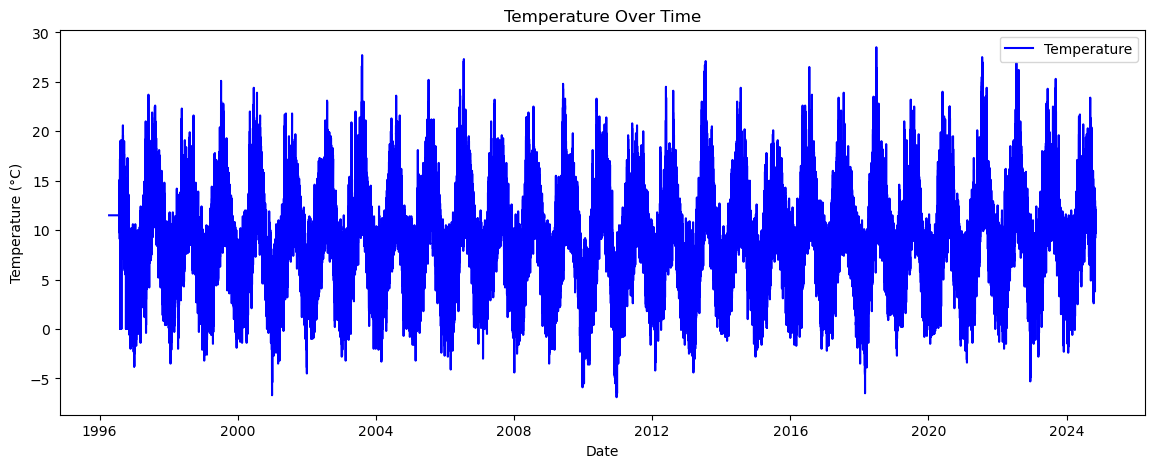

In [140]:
# Plot Temperature
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['temp'], label='Temperature', color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


### 

#### Daily Mean Temperature

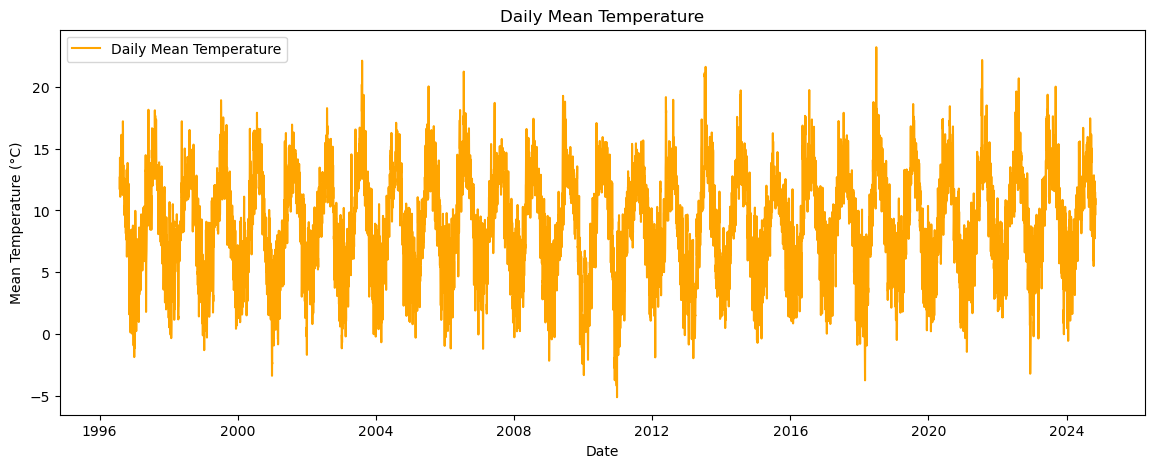

In [141]:
# Calculate daily mean temperature
daily_mean_temp = data['temp'].resample('D').mean()

# Plot Daily Mean Temperature
plt.figure(figsize=(14, 5))
plt.plot(daily_mean_temp.index, daily_mean_temp, label='Daily Mean Temperature', color='orange')
plt.title('Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


### 

#### Monthly Mean Temperature

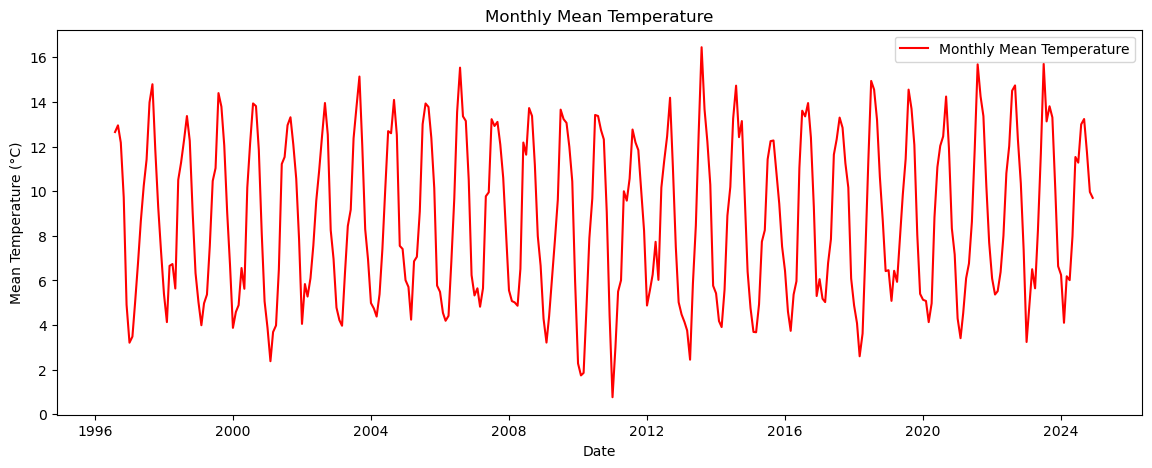

In [142]:
# Calculate monthly mean temperature
monthly_mean_temp = data['temp'].resample('M').mean()

# Plot Monthly Mean Temperature
plt.figure(figsize=(14, 5))
plt.plot(monthly_mean_temp.index, monthly_mean_temp, label='Monthly Mean Temperature', color='red')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


***

### Windspeed

#### Windspeed Over Time

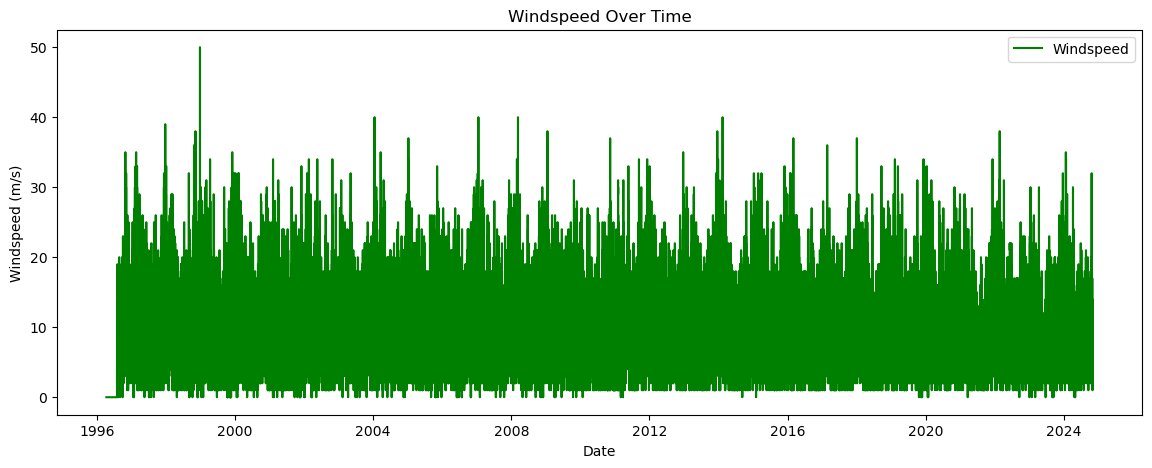

In [143]:
# Plot Windspeed
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['wdsp'], label='Windspeed', color='green')
plt.title('Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed (m/s)')
plt.legend()
plt.show()


### 

#### 24-Hour Rolling Windspeed

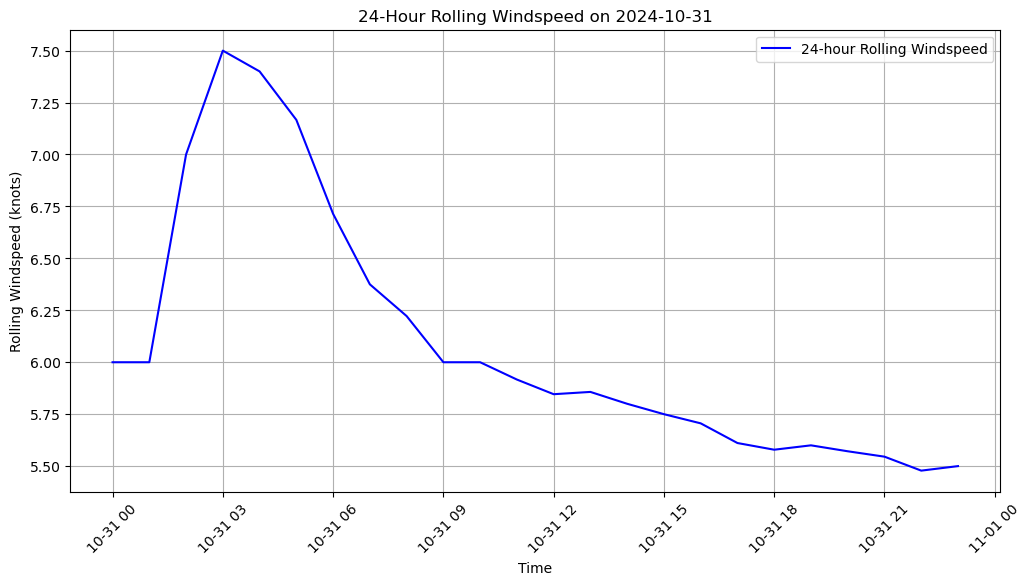

In [144]:
specific_day = '2024-10-31' 

# Filter the data for the specific day
data_specific_day = data[data.index.date == pd.to_datetime(specific_day).date()].copy()  # Use 'data' instead of 'df'

# Now use .loc to assign rolling windspeed, as we're working with a copy
data_specific_day.loc[:, 'rolling_windspeed'] = data_specific_day['wdsp'].rolling(window=24, min_periods=1).mean()

# Plot the rolling windspeed.
plt.figure(figsize=(12, 6))
plt.plot(data_specific_day.index, data_specific_day['rolling_windspeed'], label='24-hour Rolling Windspeed', color='blue')
plt.xlabel('Time')
plt.ylabel('Rolling Windspeed (knots)')
plt.title(f'24-Hour Rolling Windspeed on {specific_day}')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### Daily Mean Windspeed

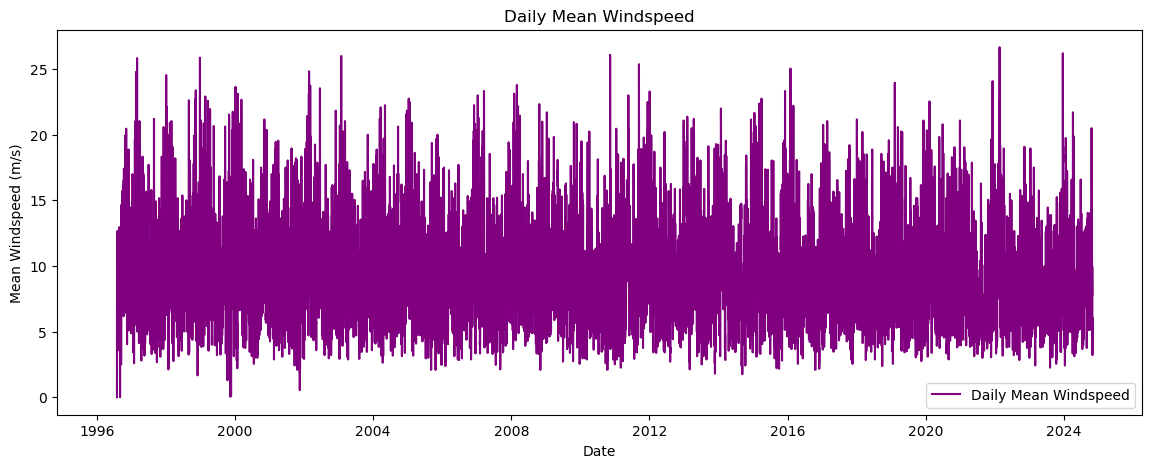

In [145]:
# Calculate daily mean Windspeed
daily_mean_wdsp = data['wdsp'].resample('D').mean()

# Plot Daily Mean Windspeed
plt.figure(figsize=(14, 5))
plt.plot(daily_mean_wdsp.index, daily_mean_wdsp, label='Daily Mean Windspeed', color='purple')
plt.title('Daily Mean Windspeed')
plt.xlabel('Date')
plt.ylabel('Mean Windspeed (m/s)')
plt.legend()
plt.show()




### 

#### Daily Max Windspeed

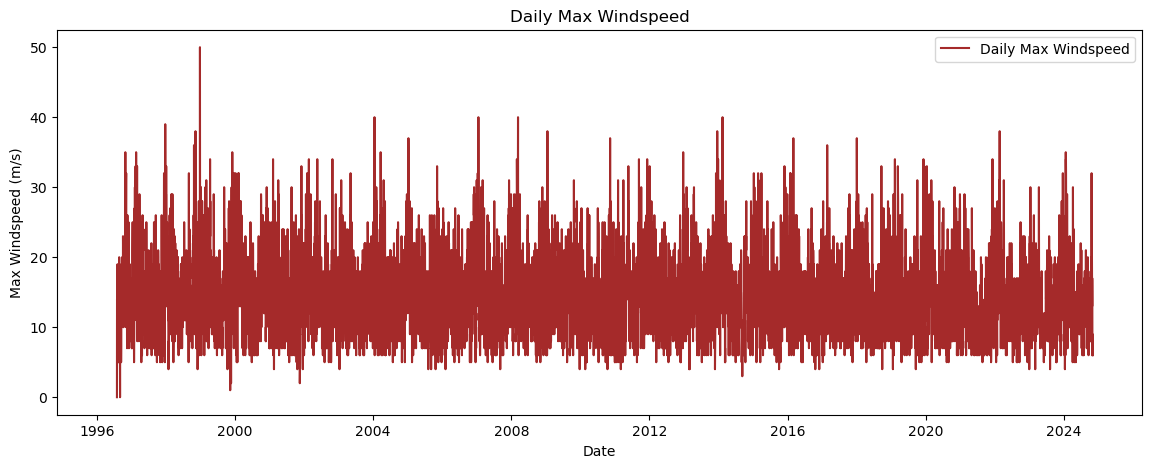

In [146]:
# Calculate daily max windspeed
daily_max_wdsp = data['wdsp'].resample('D').max()

# Plot Daily Max Windspeed
plt.figure(figsize=(14, 5))
plt.plot(daily_max_wdsp.index, daily_max_wdsp, label='Daily Max Windspeed', color='brown')
plt.title('Daily Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Max Windspeed (m/s)')
plt.legend()
plt.show()


### 

#### Monthly Mean of Daily Max Windspeed

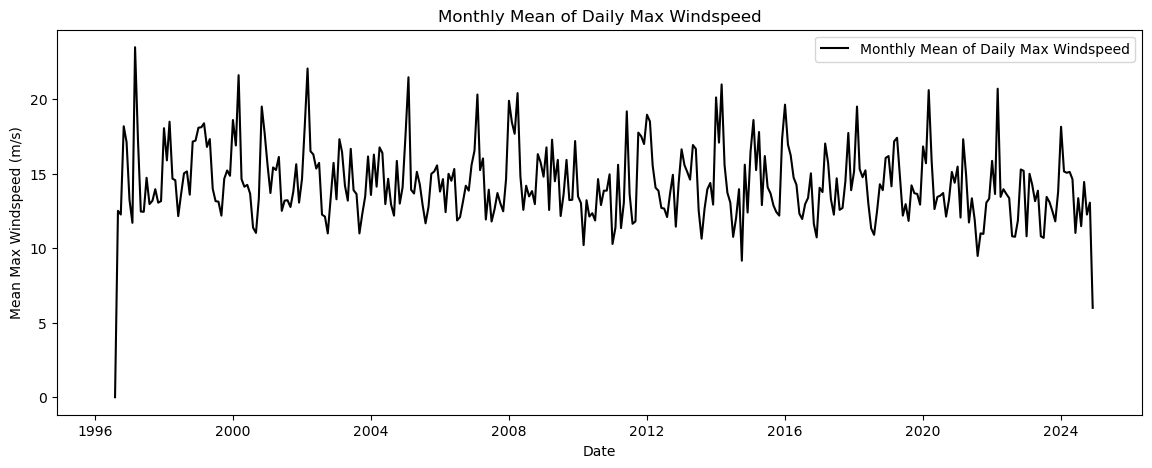

In [147]:
# Calculate monthly mean of daily max windspeed
monthly_mean_max_wdsp = daily_max_wdsp.resample('M').mean()

# Plot Monthly Mean of Daily Max Windspeed
plt.figure(figsize=(14, 5))
plt.plot(monthly_mean_max_wdsp.index, monthly_mean_max_wdsp, label='Monthly Mean of Daily Max Windspeed', color='black')
plt.title('Monthly Mean of Daily Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Mean Max Windspeed (m/s)')
plt.legend()
plt.show()
